<a href="https://colab.research.google.com/github/darishkhan/Deep_Learning_Lab/blob/main/Assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Reading data from the csv file**

In [ ]:
data = pd.read_csv("data.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Partition the data into testing data and training data with a ratio of 20:80

In [ ]:
testing_data = data.sample(frac=0.2)
training_data = data.drop(testing_data.index)

#Defining KNN function for various metrics

**KNN with Euclidean distance metric**

In [ ]:
def knn_with_euclidean(data_point, k, training_data):
  distances = []
  for i in range(len(training_data)):
    distance = np.linalg.norm(np.array(data_point[2:-1])-np.array(training_data.iloc[i, 2:-1]))
    distances.append((distance, training_data.iloc[i, 1:2][-1]))
  distances.sort()
  neighbors = distances[:k]
  malignant_count = 0
  benign_count = 0
  for i in range(len(neighbors)):
    if(neighbors[i][1]=='M'):
      malignant_count+=1;
    else:
      benign_count+=1;
  if(malignant_count>benign_count):
    return 'M'
  else:
    return 'B'


**KNN with Manhattan distance metric**

In [ ]:
def knn_with_manhattan(data_point, k, training_data):
  distances=[]
  for i in range(len(training_data)):
    distance = np.linalg.norm(np.array(data_point[2:-1])-np.array(training_data.iloc[i, 2:-1]), 1)
    distances.append((distance, training_data.iloc[i, 1:2][-1]))
  distances.sort()
  neighbors = distances[:k]
  malignant_count = 0
  benign_count = 0
  for i in range(len(neighbors)):
    if(neighbors[i][1]=='M'):
      malignant_count+=1;
    else:
      benign_count+=1;
  if(malignant_count>benign_count):
    return 'M'
  else:
    return 'B'

**KNN with Monkowski distance metric**

In [ ]:
def minkowski_distance(x, y, p):
  return np.sum(np.abs(x - y)**p)**(1/p)

In [ ]:
def knn_with_minkowski(data_point, k, training_data):
  distances=[]
  for i in range(len(training_data)):
    distance = minkowski_distance(np.array(data_point[2:-1]), np.array(training_data.iloc[i, 2:-1]), 3)
    distances.append((distance, training_data.iloc[i, 1:2][-1]))
  distances.sort()
  neighbors = distances[:k]
  malignant_count = 0
  benign_count = 0
  for i in range(len(neighbors)):
    if(neighbors[i][1]=='M'):
      malignant_count+=1;
    else:
      benign_count+=1;
  if(malignant_count>benign_count):
    return 'M'
  else:
    return 'B'

**KNN with Cosine distance metric**

In [ ]:
def cosine_similarity(x, y):
  return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
def knn_with_cosine(data_point, k, training_data):
  distances=[]
  for i in range(len(training_data)):
    distance = cosine_similarity(np.array(data_point[2:-1]), np.array(training_data.iloc[i, 2:-1]))
    distances.append((distance, training_data.iloc[i, 1:2][-1]))
  distances.sort()
  neighbors = distances[:k]
  malignant_count = 0
  benign_count = 0
  for i in range(len(neighbors)):
    if(neighbors[i][1]=='M'):
      malignant_count+=1;
    else:
      benign_count+=1;
  if(malignant_count>benign_count):
    return 'M'
  else:
    return 'B'

**KNN with Hamming Distance Metric**

In [ ]:
def hamming_distance(x, y):
  distance = 0
  for i in range(len(x)):
    if x[i] != y[i]:
      distance += 1
  return distance

In [ ]:
def knn_with_hamming(data_point, k, training_data):
  distances=[]
  for i in range(len(training_data)):
    distance = hamming_distance(np.array(data_point[2:-1]), np.array(training_data.iloc[i, 2:-1]))
    distances.append((distance, training_data.iloc[i, 1:2][-1]))
  distances.sort()
  neighbors = distances[:k]
  malignant_count = 0
  benign_count = 0
  for i in range(len(neighbors)):
    if(neighbors[i][1]=='M'):
      malignant_count+=1;
    else:
      benign_count+=1;
  if(malignant_count>benign_count):
    return 'M'
  else:
    return 'B'

#Using Euclidean Distance

In [ ]:
print("Accuracy while using Euclidean distance : ")

correct=0
for i in range(len(testing_data)):
  if(knn_with_euclidean(testing_data.iloc[i], 3, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=3: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_euclidean(testing_data.iloc[i], 4, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=4: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_euclidean(testing_data.iloc[i], 9, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=9: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_euclidean(testing_data.iloc[i], 20, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=20: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_euclidean(testing_data.iloc[i], 47, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=47: ", (correct*100)/len(testing_data))


Accuracy while using Euclidean distance : 
for k=3:  90.35087719298245
for k=4:  92.10526315789474
for k=9:  92.98245614035088
for k=20:  91.2280701754386
for k=47:  89.47368421052632


#Manhattan Distance

In [ ]:
print("Accuracy while using Manhattan distance : ")

correct=0
for i in range(len(testing_data)):
  if(knn_with_manhattan(testing_data.iloc[i], 3, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=3: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_manhattan(testing_data.iloc[i], 4, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=4: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_manhattan(testing_data.iloc[i], 9, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=9: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_manhattan(testing_data.iloc[i], 20, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=20: ", (correct*100)/len(testing_data))


correct=0
for i in range(len(testing_data)):
  if(knn_with_manhattan(testing_data.iloc[i], 47, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=47: ", (correct*100)/len(testing_data))



Accuracy while using Manhattan distance : 
for k=3:  92.98245614035088
for k=4:  91.2280701754386
for k=9:  92.10526315789474
for k=20:  92.10526315789474
for k=47:  89.47368421052632


#Minkowski Distance

In [ ]:
print("Accuracy while using Minkowski distance : ")

correct=0
for i in range(len(testing_data)):
  if(knn_with_minkowski(testing_data.iloc[i], 3, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=3: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_minkowski(testing_data.iloc[i], 4, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=4: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_minkowski(testing_data.iloc[i], 9, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=9: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_minkowski(testing_data.iloc[i], 20, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=20: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_minkowski(testing_data.iloc[i], 47, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=47: ", (correct*100)/len(testing_data))

Accuracy while using Minkowski distance : 
for k=3:  90.35087719298245
for k=4:  91.2280701754386
for k=9:  92.98245614035088
for k=20:  91.2280701754386
for k=47:  89.47368421052632


#Cosine Distance

In [ ]:
print("Accuracy while using Cosine distance : ")

correct=0
for i in range(len(testing_data)):
  if(knn_with_cosine(testing_data.iloc[i], 3, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=3: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_cosine(testing_data.iloc[i], 4, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=4: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_cosine(testing_data.iloc[i], 9, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=9: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_cosine(testing_data.iloc[i], 20, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=20: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_cosine(testing_data.iloc[i], 47, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=47: ", (correct*100)/len(testing_data))

Accuracy while using Cosine distance : 
for k=3:  22.80701754385965
for k=4:  14.035087719298245
for k=9:  11.403508771929825
for k=20:  7.894736842105263
for k=47:  6.140350877192983


#Hamming Distance

In [ ]:
print("Accuracy while using Hamming distance : ")

correct=0
for i in range(len(testing_data)):
  if(knn_with_hamming(testing_data.iloc[i], 3, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=3: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_hamming(testing_data.iloc[i], 4, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=4: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_hamming(testing_data.iloc[i], 9, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=9: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_hamming(testing_data.iloc[i], 20, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=20: ", (correct*100)/len(testing_data))

correct=0
for i in range(len(testing_data)):
  if(knn_with_hamming(testing_data.iloc[i], 47, training_data)==testing_data.iloc[i, 1:2][-1]):
    correct+=1
print("for k=47: ", (correct*100)/len(testing_data))

Accuracy while using Hamming distance : 
for k=3:  70.17543859649123
for k=4:  70.17543859649123
for k=9:  67.54385964912281
for k=20:  66.66666666666667
for k=47:  66.66666666666667


#Result:
We got the highest accuracy for k=47 in Manhattan and Minkowski metric.

*Note: This may change for every execution as the testing and training data are randomly partitioned.*




Confusion Matrix for k=47, Manhattan Distance

In [ ]:
tp=0
tn=0
fp=0
fn=0
for i in range(len(testing_data)):
  predicted = knn_with_manhattan(testing_data.iloc[i], 47, training_data)
  actual = testing_data.iloc[i, 1:2][-1]
  if predicted == 'M' and actual == 'M':
    tp += 1
  elif predicted == 'B' and actual == 'B':
    tn += 1
  elif predicted == 'M' and actual == 'B':
    fp += 1
  else:
    fn += 1

print("Confusion Matrix:")
print("                Actual")
print("Predicted      M      B")
print("     M        ", tp, "   ", fp)
print("     B        ", fn, "   ", tn)

print("Recall: ", tp/(tp+fn))
print("Precision: ", tp/(tp+fp))
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))


Confusion Matrix:
                Actual
Predicted      M      B
     M         29     3
     B         9     73
Recall:  0.7631578947368421
Precision:  0.90625
Accuracy:  0.8947368421052632


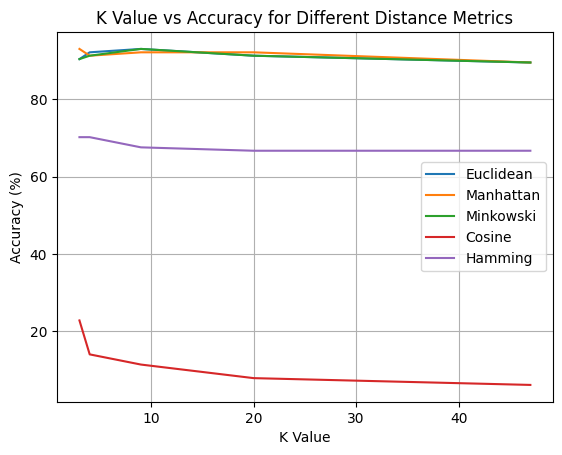

In [ ]:
k_values = [3, 4, 9, 20, 47]

euclidean_accuracies = []
manhattan_accuracies = []
minkowski_accuracies = []
cosine_accuracies = []
hamming_accuracies = []

for k in k_values:
  correct_euclidean = 0
  correct_manhattan = 0
  correct_minkowski = 0
  correct_cosine = 0
  correct_hamming = 0

  for i in range(len(testing_data)):
    if knn_with_euclidean(testing_data.iloc[i], k, training_data) == testing_data.iloc[i, 1:2][-1]:
      correct_euclidean += 1
    if knn_with_manhattan(testing_data.iloc[i], k, training_data) == testing_data.iloc[i, 1:2][-1]:
      correct_manhattan += 1
    if knn_with_minkowski(testing_data.iloc[i], k, training_data) == testing_data.iloc[i, 1:2][-1]:
      correct_minkowski += 1
    if knn_with_cosine(testing_data.iloc[i], k, training_data) == testing_data.iloc[i, 1:2][-1]:
      correct_cosine += 1
    if knn_with_hamming(testing_data.iloc[i], k, training_data) == testing_data.iloc[i, 1:2][-1]:
      correct_hamming += 1

  euclidean_accuracies.append((correct_euclidean * 100) / len(testing_data))
  manhattan_accuracies.append((correct_manhattan * 100) / len(testing_data))
  minkowski_accuracies.append((correct_minkowski * 100) / len(testing_data))
  cosine_accuracies.append((correct_cosine * 100) / len(testing_data))
  hamming_accuracies.append((correct_hamming * 100) / len(testing_data))

plt.plot(k_values, euclidean_accuracies, label='Euclidean')
plt.plot(k_values, manhattan_accuracies, label='Manhattan')
plt.plot(k_values, minkowski_accuracies, label='Minkowski')
plt.plot(k_values, cosine_accuracies, label='Cosine')
plt.plot(k_values, hamming_accuracies, label='Hamming')

plt.xlabel('K Value')
plt.ylabel('Accuracy (%)')
plt.title('K Value vs Accuracy for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()
